# **Praktikum 3**
Sherly Santiadi (2072025)

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
# save filepath to variable for easier access
path="/content/drive/My Drive/praktikum-ml/Surgical-deepnet.csv"

# read the data and store data in DataFrame titled dataframe
dataframe=pd.read_csv(path,index_col=0)

# print a summary of the data 
dataframe.head()

Mounted at /content/drive


,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
bmi,,,,,,,,,,,,,,,,,,,,,,,,
19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


In [2]:
dataframe.shape

(14635, 24)

In [3]:
import numpy as np
# axis=1 : column
# using drop because it's better to drop what column we don't need instead of adding one by one what column that we need
X = dataframe.drop(['complication'],axis=1)
X.shape

(14635, 23)

In [4]:
y= dataframe['complication'].values[:,np.newaxis]
y.shape

(14635, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


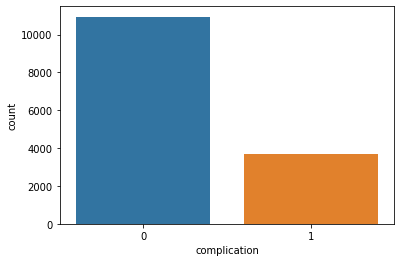

In [5]:
# Plotting Complication
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

plt.figure(figsize = (6,4))
sns.countplot(dataframe['complication'])
plt.show()

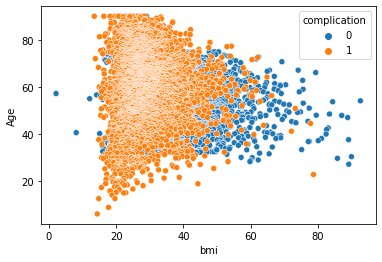

In [6]:
# Plotting the highest correlated pairs from data
sns.scatterplot(data=dataframe, x='bmi', y='Age', hue='complication')
plt.show()

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [8]:
X_train.shape

(11708, 23)

In [9]:
y_test.shape

(2927, 1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
X_train.shape

(8781, 23)

In [12]:
X_val.shape

(2927, 23)

In [13]:
X_test.shape

(2927, 23)

In [14]:
from sklearn.linear_model import SGDClassifier
sgdModel = SGDClassifier(random_state = 42)
sgdModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [15]:
y_pred_1 = sgdModel.predict(X_test)
y_pred_1

array([0, 1, 1, ..., 1, 1, 1])

In [16]:
# Accuracy total
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_1)

0.5517594806969593

In [17]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_test, y_pred_1)

0.35600206079340546

In [18]:
recall_score(y_test, y_pred_1)

0.9176626826029216

In [19]:
# From recall & precision we've got F1 Score
matrix = classification_report(y_test,y_pred_1,labels=[1,0])
print('Classificationr report: \n', matrix)

Classificationr report: 
               precision    recall  f1-score   support

           1       0.36      0.92      0.51       753
           0       0.94      0.43      0.58      2174

    accuracy                           0.55      2927
   macro avg       0.65      0.67      0.55      2927
weighted avg       0.79      0.55      0.57      2927



<function matplotlib.pyplot.show>

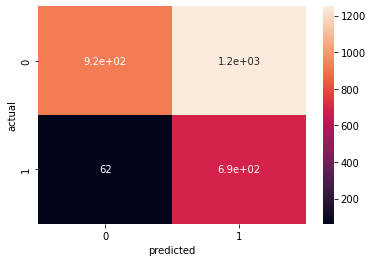

In [20]:
data = { 'y_actual': y_test.flatten(), 'y_predicted': y_pred_1}
df = pd.DataFrame(data, columns=['y_actual', 'y_predicted'])
confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['actual'], colnames=['predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show

In [21]:
from sklearn.metrics import precision_recall_curve
precision_score(df['y_actual'], df['y_predicted']) 
precisions, recalls, threholds = precision_recall_curve(y_test, y_pred_1)

In [22]:
precisions[:-1]

array([0.25725999, 0.35600206])

In [23]:
precisions

array([0.25725999, 0.35600206, 1.        ])

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

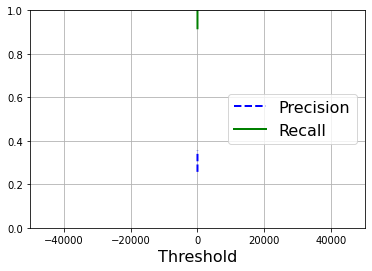

In [25]:
plot_precision_recall_vs_threshold(precisions, recalls, threholds)
plt.show()

In [26]:
some_data = X.iloc[0]

In [27]:
from sklearn.metrics import roc_curve
y_scores = sgdModel.decision_function([some_data])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([16.9165327])

In [28]:
y_train.shape

(8781, 1)

In [29]:
y_scores.shape

(1,)

In [30]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(
    SGDClassifier(random_state = 42)
)

In [31]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [32]:
n_classes = y.shape[1]

In [33]:
n_classes

1

In [34]:
y_test[:, 0]

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
y_scores

array([16.9165327])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


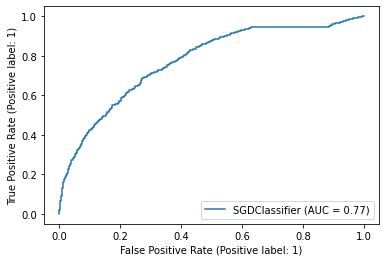

In [36]:
# ROC Curve
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(sgdModel, X_test, y_test) 
plt.show()